# Regression Homework
The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

Preparing the dataset
Use only the following columns:

'engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg'

In [525]:
import numpy as np;
import pandas as pd;
df= pd.read_csv(r"C:\Users\Kofi Konadu Opoku\Desktop\Koficonda\car_fuel_efficiency.csv")
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [526]:
df=df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


## EDA
Look at the fuel_efficiency_mpg variable. Does it have a long tail?
**Answer:** After using matplotlib and seaborn to plot fuel_efficiency_mpg **I can deduce it has no tail**


In [527]:
import matplotlib.pyplot as plt;
import seaborn as sns;
%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

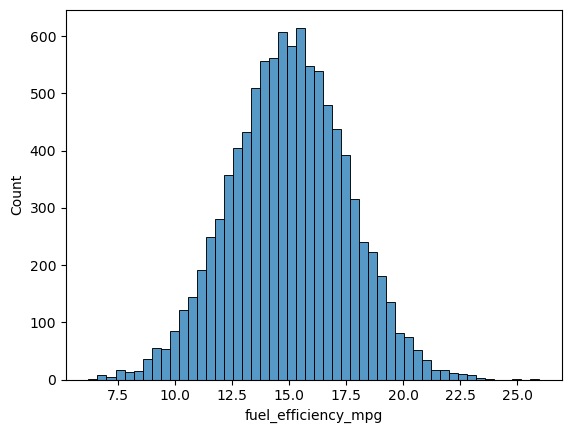

In [528]:
sns.histplot(df['fuel_efficiency_mpg'],bins=50)

## Question 1
There's one column with missing values. What is it?
'engine_displacement'
'horsepower'
'vehicle_weight'
'model_year'

---valued
**Answer:** horsepower with 708 missing values

In [529]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

## Question 2
What's the median (50% percentile) for variable 'horsepower'?

49
99
149
199
Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use the same code as in the lectures

**The median value is 149**

In [530]:
# median value
df['horsepower'].median()

149.0

In [531]:
# shuffling the dataset
idx=np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
#splitting the dataset
n= len(df)
train_n= int(0.6 * n)
val_n=int(0.2 * n)
test_n= int(n-(train_n + val_n))

df_train=df.iloc[idx[: train_n]]
df_val=df.iloc[idx[train_n: train_n + val_n]]
df_test=df.iloc[idx[train_n + val_n:]]


Question 3
We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?
Options:

With 0
With mean
Both are equally good

In [532]:
y_train=df_train.fuel_efficiency_mpg.values
y_val=df_val.fuel_efficiency_mpg.values
y_test=df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [533]:
df_train= df_train.fillna(0)
df_val= df_val.fillna(0)
df_test= df_test.fillna(0)
x_train=df_train.values
x_val=df_val.values
x_test= df_test.values

In [534]:
# Matrix
def prepare_X(df):
    df['Age']= 2023 - df['model_year']
    base=['engine_displacement','horsepower' ,'vehicle_weight']
    features= base + ['Age']
    df_base=df[features].fillna(0)
    X= df_base.values
    return X




In [535]:
# train linear regression
def train_linear_regression(x,y):
    ones= np.ones(x.shape[0])
    X=np.column_stack([ones,x])
    XTX=X.T.dot(X)
    XTX_inv= np.linalg.inv(XTX)
    w_full= XTX_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]

In [536]:
# RMSE
def rmse(y, y_pred):
    se= (y-y_pred)**2
    mse= se.mean()
    rmse=np.sqrt(mse)
    return rmse

In [537]:
# first rmse
x_train= prepare_X(df_train)
w0,w=train_linear_regression(x_train,y_train)
w0,w

x_val= prepare_X(df_val)
y_pred= w0 + x_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5171866956560176)

After using the two options to find the rmse. the option with using the mean to fill the missing value is the better option with an rmse of 0.46

## question 4
Now let's train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?
If multiple options give the same best RMSE, select the smallest r.


**The best regularization parameter is 0.1**

In [538]:
def train_linear_regression_reg(x,y,r):
    ones= np.ones(x.shape[0])
    X=np.column_stack([ones,x])
    XTX=X.T.dot(X)
    XTX=XTX + r*np.eye(XTX.shape[0])
    XTX_inv= np.linalg.inv(XTX)
    w_full= XTX_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]

In [539]:
x_train= prepare_X(df_train)
w0,w=train_linear_regression_reg(x_train,y_train,r=0.01)
w0,w

x_val= prepare_X(df_val)
y_pred= w0 + x_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.517183562531252)

In [540]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    x_train= prepare_X(df_train)
    w0,w=train_linear_regression_reg(x_train,y_train,r=r)
    w0,w
    
    x_val= prepare_X(df_val)
    y_pred= w0 + x_val.dot(w)
    score=rmse(y_val, y_pred)
    print(r,score)



    

0 0.5171866956560176
0.01 0.517183562531252
0.1 0.5171711153267267
1 0.5185694869483709
5 0.5535512372421887
10 0.6407571048790393
100 2.0590128066179885


## Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))
What's the value of std?

0.001
0.006
0.060
0.600

**The nearest standard deviation in the option is 0.006**

In [541]:
rmse_scores=[]
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    # shuffling the dataset
    idx=np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    #splitting the dataset
    n= len(df)
    train_n= int(0.6 * n)
    val_n=int(0.2 * n)
    test_n= int(n-(train_n + val_n))
    
    df_train=df.iloc[idx[: train_n]]
    df_val=df.iloc[idx[train_n: train_n + val_n]]
    df_test=df.iloc[idx[train_n + val_n:]]


    y_train=df_train.fuel_efficiency_mpg.values
    y_val=df_val.fuel_efficiency_mpg.values
    y_test=df_test.fuel_efficiency_mpg.values
    
    
    df_train= df_train.fillna(0)
    df_val= df_val.fillna(0)
    df_test= df_test.fillna(0)
    x_train=df_train.values
    x_val=df_val.values
    x_test= df_test.values

    x_train= prepare_X(df_train)
    w0,w=train_linear_regression(x_train,y_train)
    w0,w
    
    x_val= prepare_X(df_val)
    y_pred= w0 + x_val.dot(w)
    score=rmse(y_val, y_pred)
    score=np.round(score,3)
    rmse_scores.append(score)
print(rmse_scores)
print(np.std(rmse_scores))  
            

[np.float64(0.521), np.float64(0.522), np.float64(0.523), np.float64(0.516), np.float64(0.511), np.float64(0.529), np.float64(0.532), np.float64(0.51), np.float64(0.515), np.float64(0.513)]
0.007096477999684075


# Questtion 6
Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?

**The rmse on the test dataset is 0.515**

In [543]:
idx=np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
#splitting the dataset
n= len(df)
train_n= int(0.6 * n)
val_n=int(0.2 * n)
test_n= int(n-(train_n + val_n))

df_train=df.iloc[idx[: train_n]]
df_val=df.iloc[idx[train_n: train_n + val_n]]
df_test=df.iloc[idx[train_n + val_n:]]


y_train=df_train.fuel_efficiency_mpg.values
y_val=df_val.fuel_efficiency_mpg.values
y_test=df_test.fuel_efficiency_mpg.values


df_train= df_train.fillna(0)
df_val= df_val.fillna(0)
df_test= df_test.fillna(0)
x_train=df_train.values
x_val=df_val.values
x_test= df_test.values

df_full_train= pd.concat([df_train,df_val])
df_full_train= df_full_train.reset_index(drop=True)
y_full_train= np.concatenate([y_train,y_val])
x_full_train= prepare_X(df_full_train)

w0,w=train_linear_regression_reg(x_full_train,y_full_train,r=0.1)
w0,w

x_test= prepare_X(df_test)
y_pred= w0 + x_test.dot(w)
score=rmse(y_test, y_pred)
score

np.float64(0.5153863481284869)